In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')


In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28158 entries, 0 to 28157
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              28158 non-null  object 
 1   iso_code                             28158 non-null  object 
 2   date                                 28158 non-null  object 
 3   total_vaccinations                   15744 non-null  float64
 4   people_vaccinated                    14938 non-null  float64
 5   people_fully_vaccinated              12199 non-null  float64
 6   daily_vaccinations_raw               12999 non-null  float64
 7   daily_vaccinations                   27884 non-null  float64
 8   total_vaccinations_per_hundred       15744 non-null  float64
 9   people_vaccinated_per_hundred        14938 non-null  float64
 10  people_fully_vaccinated_per_hundred  12199 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
data.isnull().sum().sort_values(ascending=False)

people_fully_vaccinated                15959
people_fully_vaccinated_per_hundred    15959
daily_vaccinations_raw                 15159
people_vaccinated                      13220
people_vaccinated_per_hundred          13220
total_vaccinations                     12414
total_vaccinations_per_hundred         12414
daily_vaccinations                       274
daily_vaccinations_per_million           274
country                                    0
iso_code                                   0
date                                       0
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
data.isnull().sum().sort_values(ascending=False)/len(data)

people_fully_vaccinated                0.566766
people_fully_vaccinated_per_hundred    0.566766
daily_vaccinations_raw                 0.538355
people_vaccinated                      0.469494
people_vaccinated_per_hundred          0.469494
total_vaccinations                     0.440869
total_vaccinations_per_hundred         0.440869
daily_vaccinations                     0.009731
daily_vaccinations_per_million         0.009731
country                                0.000000
iso_code                               0.000000
date                                   0.000000
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [7]:
data2=pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv')

In [8]:
data2.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30921
4,Austria,2021-01-15,Johnson&Johnson,0


In [9]:
data2.isnull().sum().sort_values(ascending=False)

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8290 entries, 0 to 8289
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            8290 non-null   object
 1   date                8290 non-null   object
 2   vaccine             8290 non-null   object
 3   total_vaccinations  8290 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 259.2+ KB


In [11]:
new_data=data.merge(data2,how='right',on=['date'])

In [12]:
new_data.head()

,country,iso_code,date,total_vaccinations_x,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,location,vaccine,total_vaccinations_y
0,Argentina,ARG,2021-01-08,107542.0,NaN,NaN,NaN,10519.0,0.24,NaN,NaN,233.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,Austria,Johnson&Johnson,0
1,Austria,AUT,2021-01-08,24213.0,24213.0,NaN,13090.0,2737.0,0.27,0.27,NaN,304.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...,Austria,Johnson&Johnson,0
2,Bahrain,BHR,2021-01-08,78291.0,78291.0,NaN,6052.0,2706.0,4.60,4.60,NaN,1590.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/,Austria,Johnson&Johnson,0
3,Belarus,BLR,2021-01-08,NaN,NaN,NaN,NaN,403.0,NaN,NaN,NaN,43.0,"BBIBP-CorV, Sputnik V",World Health Organization,https://covid19.who.int/,Austria,Johnson&Johnson,0
4,Belgium,BEL,2021-01-08,24102.0,24102.0,121.0,9303.0,3327.0,0.21,0.21,0.0,287.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/,Austria,Johnson&Johnson,0


In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361787 entries, 0 to 1361786
Data columns (total 18 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   country                              1361776 non-null  object 
 1   iso_code                             1361776 non-null  object 
 2   date                                 1361787 non-null  object 
 3   total_vaccinations_x                 754213 non-null   float64
 4   people_vaccinated                    716908 non-null   float64
 5   people_fully_vaccinated              606227 non-null   float64
 6   daily_vaccinations_raw               625110 non-null   float64
 7   daily_vaccinations                   1352031 non-null  float64
 8   total_vaccinations_per_hundred       754213 non-null   float64
 9   people_vaccinated_per_hundred        716908 non-null   float64
 10  people_fully_vaccinated_per_hundred  606227 non-null   float64
 11

In [14]:
new_data['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United States', 'Uruguay'], dtype=object)

In [15]:
new_data['location'].value_counts()

Germany          111824
Iceland          111700
Italy             95919
Lithuania         94779
Czechia           93784
France            93594
Latvia            92163
Romania           88152
United States     74775
Chile             71873
Uruguay           69009
Switzerland       48328
Japan             28930
Hungary           20729
Slovakia          16844
Netherlands       16336
Poland            16336
Finland           16207
Austria           16152
Spain             15636
Croatia           15240
Portugal          15065
Ireland           14429
Bulgaria          14211
Belgium           13916
Luxembourg        13643
Estonia           13552
Slovenia          13016
Cyprus            12653
Denmark           12515
Malta             11930
Sweden            11451
Liechtenstein      7096
Name: location, dtype: int64

<AxesSubplot:xlabel='count', ylabel='location'>

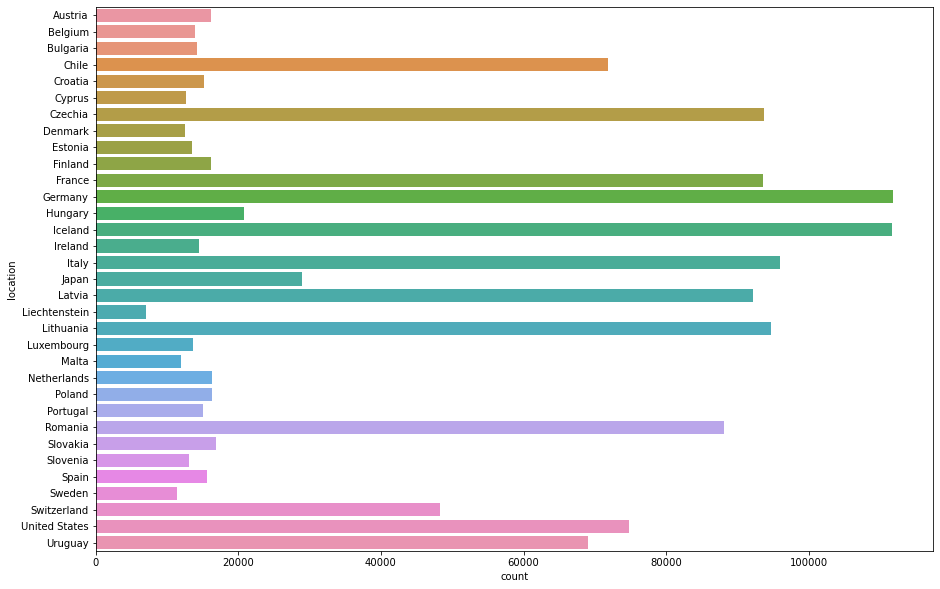

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(y='location',data=new_data)
#plt.xticks(rotation=90)

In [17]:
new_data['date'].unique()

array(['2021-01-08', '2021-01-15', '2021-01-22', '2021-01-29',
       '2021-02-05', '2021-02-12', '2021-02-19', '2021-02-26',
       '2021-03-05', '2021-03-12', '2021-03-19', '2021-03-26',
       '2021-04-02', '2021-04-09', '2021-04-16', '2021-04-23',
       '2021-04-30', '2021-05-07', '2021-05-14', '2021-05-21',
       '2021-05-28', '2021-06-04', '2021-06-11', '2021-06-18',
       '2021-06-25', '2021-06-29', '2021-01-01', '2020-12-24',
       '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-02',
       '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
       '2021-01-07', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-16',
       '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
       '2021-01-21', '2021-01-23', '2021-01-24', '2021-01-25',
       '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-30',
       '2021-01-31', '2021-02-01', '2021-02-02', '2021-

In [18]:
new_data['vaccine'].value_counts()

Pfizer/BioNTech       425114
Moderna               350530
Oxford/AstraZeneca    314276
Johnson&Johnson       207161
Sinovac                48590
Sputnik V               6840
CanSino                 5829
Sinopharm/Beijing       3447
Name: vaccine, dtype: int64

<AxesSubplot:xlabel='vaccine', ylabel='count'>

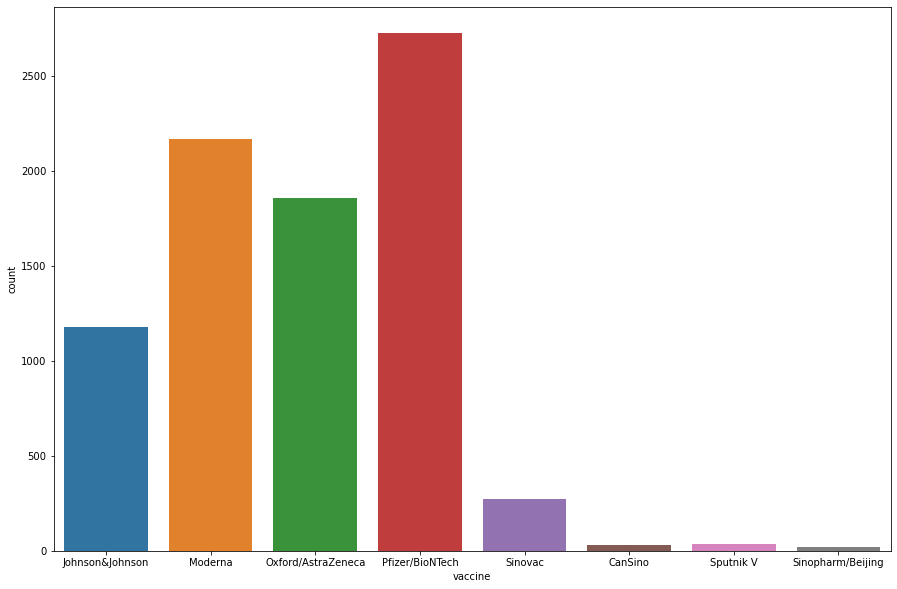

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='vaccine',data=data2)

In [20]:
data2['vaccine'].groupby

<bound method Series.groupby of 0          Johnson&Johnson
1                  Moderna
2       Oxford/AstraZeneca
3          Pfizer/BioNTech
4          Johnson&Johnson
               ...        
8285       Pfizer/BioNTech
8286               Sinovac
8287    Oxford/AstraZeneca
8288       Pfizer/BioNTech
8289               Sinovac
Name: vaccine, Length: 8290, dtype: object>

In [22]:
data['vaccines'].isin(data2['vaccine']).value_counts()

False    22086
True      6072
Name: vaccines, dtype: int64

In [23]:
new_data.shape

(1361787, 18)

In [24]:
new_data.head()

,country,iso_code,date,total_vaccinations_x,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,location,vaccine,total_vaccinations_y
0,Argentina,ARG,2021-01-08,107542.0,NaN,NaN,NaN,10519.0,0.24,NaN,NaN,233.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,Austria,Johnson&Johnson,0
1,Austria,AUT,2021-01-08,24213.0,24213.0,NaN,13090.0,2737.0,0.27,0.27,NaN,304.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...,Austria,Johnson&Johnson,0
2,Bahrain,BHR,2021-01-08,78291.0,78291.0,NaN,6052.0,2706.0,4.60,4.60,NaN,1590.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/,Austria,Johnson&Johnson,0
3,Belarus,BLR,2021-01-08,NaN,NaN,NaN,NaN,403.0,NaN,NaN,NaN,43.0,"BBIBP-CorV, Sputnik V",World Health Organization,https://covid19.who.int/,Austria,Johnson&Johnson,0
4,Belgium,BEL,2021-01-08,24102.0,24102.0,121.0,9303.0,3327.0,0.21,0.21,0.0,287.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/,Austria,Johnson&Johnson,0


In [25]:
new_data.isnull().sum().sort_values(ascending=False)

people_fully_vaccinated                755560
people_fully_vaccinated_per_hundred    755560
daily_vaccinations_raw                 736677
people_vaccinated_per_hundred          644879
people_vaccinated                      644879
total_vaccinations_x                   607574
total_vaccinations_per_hundred         607574
daily_vaccinations                       9756
daily_vaccinations_per_million           9756
vaccines                                   11
source_website                             11
source_name                                11
country                                    11
iso_code                                   11
date                                        0
location                                    0
vaccine                                     0
total_vaccinations_y                        0
dtype: int64

In [26]:
new_data.isnull().sum().sort_values(ascending=False)/len(new_data)

people_fully_vaccinated                0.554830
people_fully_vaccinated_per_hundred    0.554830
daily_vaccinations_raw                 0.540963
people_vaccinated_per_hundred          0.473553
people_vaccinated                      0.473553
total_vaccinations_x                   0.446159
total_vaccinations_per_hundred         0.446159
daily_vaccinations                     0.007164
daily_vaccinations_per_million         0.007164
vaccines                               0.000008
source_website                         0.000008
source_name                            0.000008
country                                0.000008
iso_code                               0.000008
date                                   0.000000
location                               0.000000
vaccine                                0.000000
total_vaccinations_y                   0.000000
dtype: float64

In [27]:
new_data.drop(['people_fully_vaccinated','people_fully_vaccinated_per_hundred',
               'daily_vaccinations_raw','people_vaccinated_per_hundred','people_vaccinated',
              'total_vaccinations_x','total_vaccinations_per_hundred'],axis=1,inplace=True)

In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361787 entries, 0 to 1361786
Data columns (total 11 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   country                         1361776 non-null  object 
 1   iso_code                        1361776 non-null  object 
 2   date                            1361787 non-null  object 
 3   daily_vaccinations              1352031 non-null  float64
 4   daily_vaccinations_per_million  1352031 non-null  float64
 5   vaccines                        1361776 non-null  object 
 6   source_name                     1361776 non-null  object 
 7   source_website                  1361776 non-null  object 
 8   location                        1361787 non-null  object 
 9   vaccine                         1361787 non-null  object 
 10  total_vaccinations_y            1361787 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 124.7+ MB


In [29]:
new_data.isnull().sum().sort_values(ascending=False)/len(new_data)

daily_vaccinations                0.007164
daily_vaccinations_per_million    0.007164
country                           0.000008
iso_code                          0.000008
vaccines                          0.000008
source_name                       0.000008
source_website                    0.000008
date                              0.000000
location                          0.000000
vaccine                           0.000000
total_vaccinations_y              0.000000
dtype: float64

In [30]:
new_data['daily_vaccinations']=new_data['daily_vaccinations'].fillna(new_data['daily_vaccinations'].median())
new_data['daily_vaccinations_per_million']=new_data['daily_vaccinations_per_million'].fillna(new_data['daily_vaccinations_per_million'].median())

In [31]:
new_data.isnull().sum().sort_values(ascending=False)/len(new_data)

country                           0.000008
iso_code                          0.000008
vaccines                          0.000008
source_name                       0.000008
source_website                    0.000008
date                              0.000000
daily_vaccinations                0.000000
daily_vaccinations_per_million    0.000000
location                          0.000000
vaccine                           0.000000
total_vaccinations_y              0.000000
dtype: float64

In [32]:
data['country'].isin(data2['location']).value_counts()

False    22234
True      5924
Name: country, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

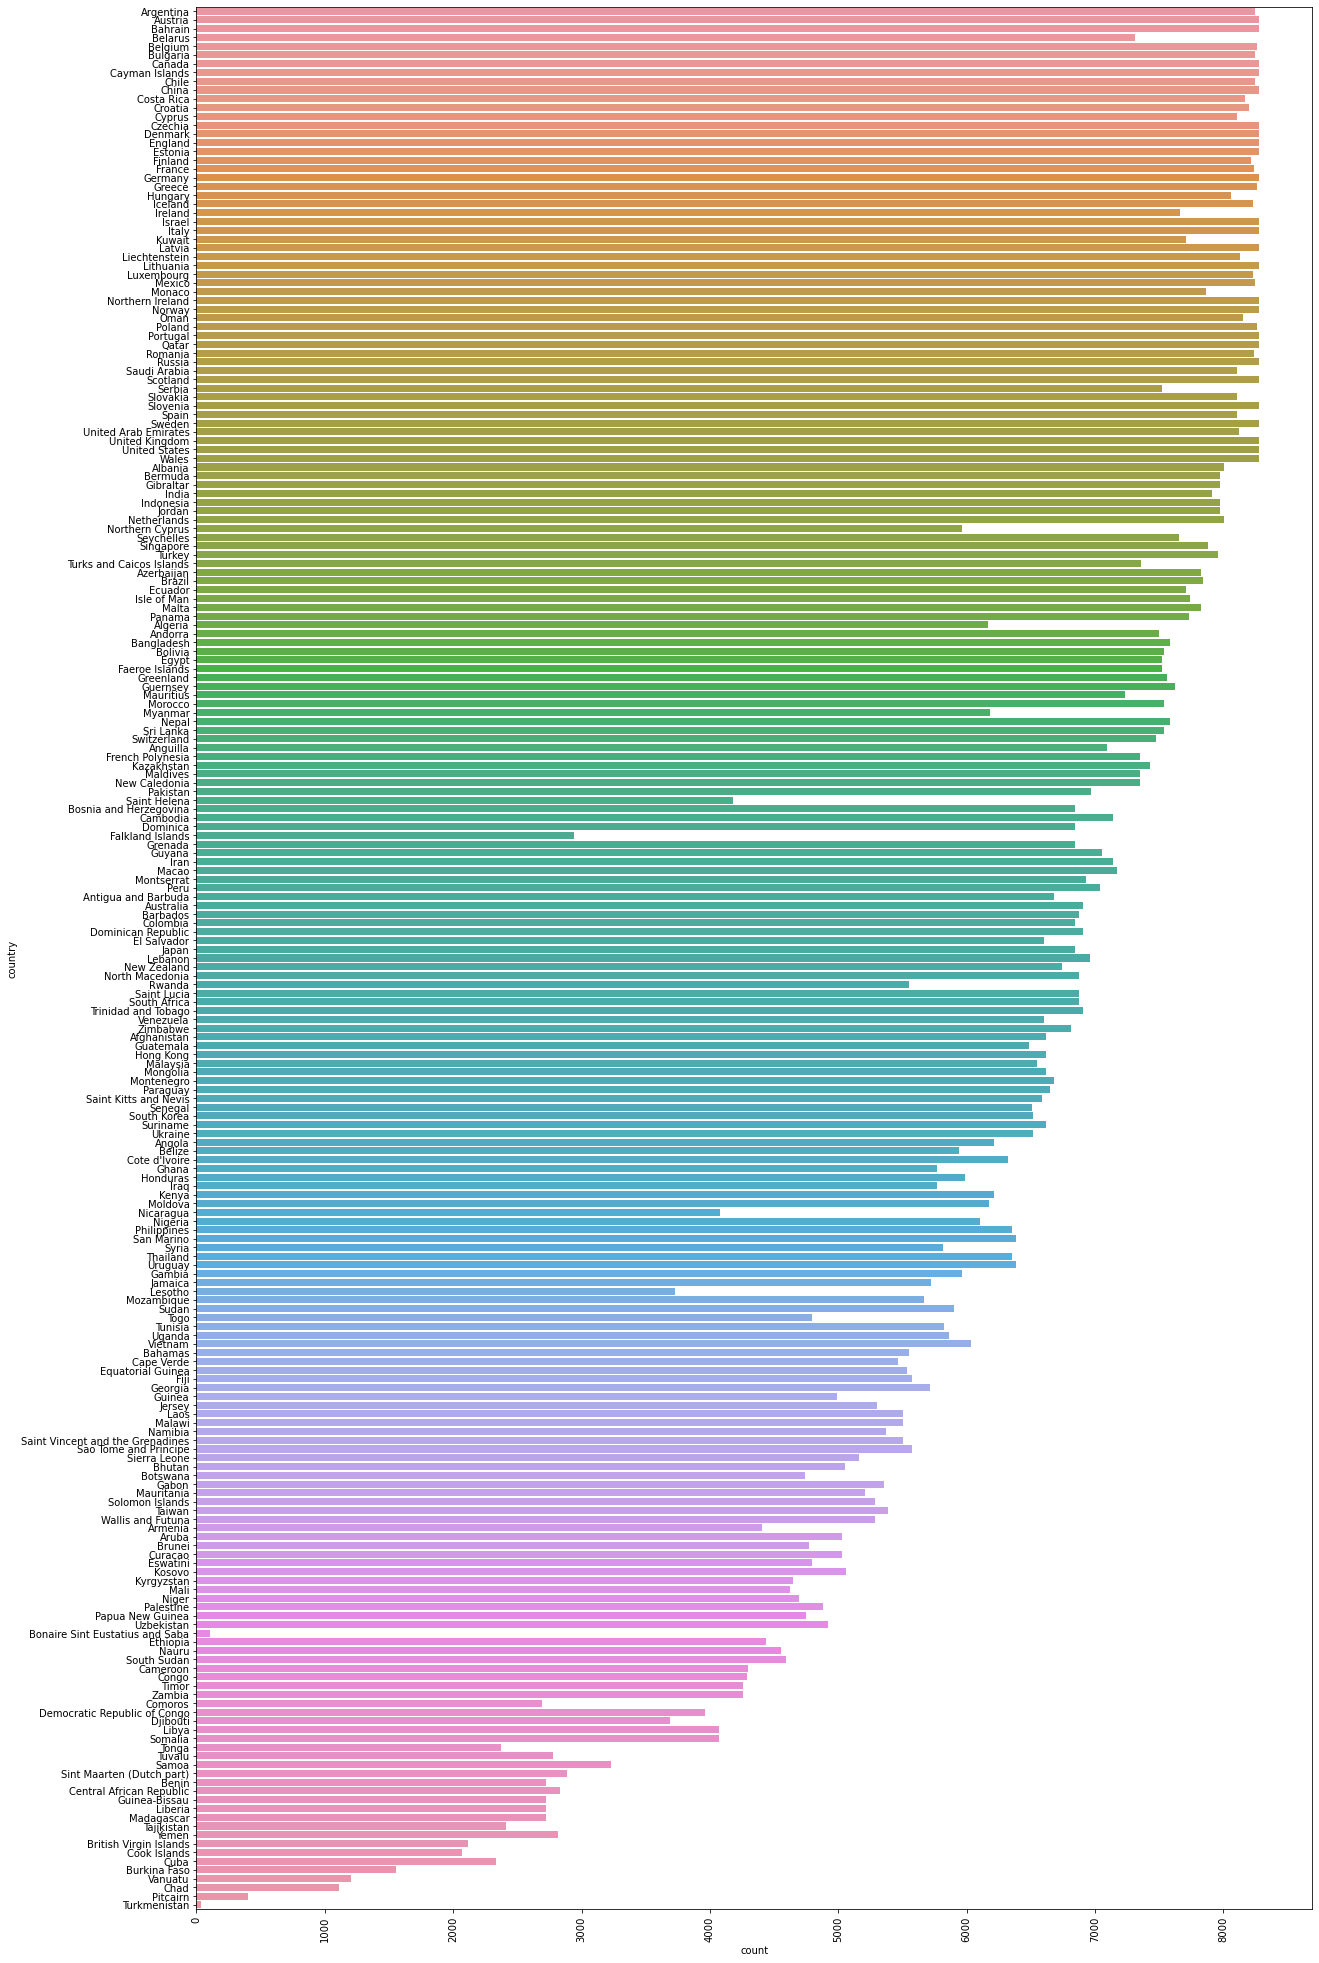

In [33]:
plt.figure(figsize=(20,35))
sns.countplot(y='country',data=new_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Austria'),
  Text(1, 0, 'Belgium'),
  Text(2, 0, 'Bulgaria'),
  Text(3, 0, 'Chile'),
  Text(4, 0, 'Croatia'),
  Text(5, 0, 'Cyprus'),
  Text(6, 0, 'Czechia'),
  Text(7, 0, 'Denmark'),
  Text(8, 0, 'Estonia'),
  Text(9, 0, 'Finland'),
  Text(10, 0, 'France'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Hungary'),
  Text(13, 0, 'Iceland'),
  Text(14, 0, 'Ireland'),
  Text(15, 0, 'Italy'),
  Text(16, 0, 'Japan'),
  Text(17, 0, 'Latvia'),
  Text(18, 0, 'Liechtenstein'),
  Text(19, 0, 'Lithuania'),
  Text(20, 0, 'Luxembourg'),
  Text(21, 0, 'Malta'),
  Text(22, 0, 'Netherlands'),
  Text(23, 0, 'Poland'),
  Text(24, 0, 'Portugal'),
  Text(25, 0, 'Romania'),
  Text(26, 0, 'Slovakia'),
  Text(27, 0, 'Slovenia'),
  Text(28, 0, 'Spain'),
  Text(29, 0, 'Sweden'),
  Text(30, 0, 'Switzerland'),
  Text(31, 0, 'United States'),
  Text(32, 0, 

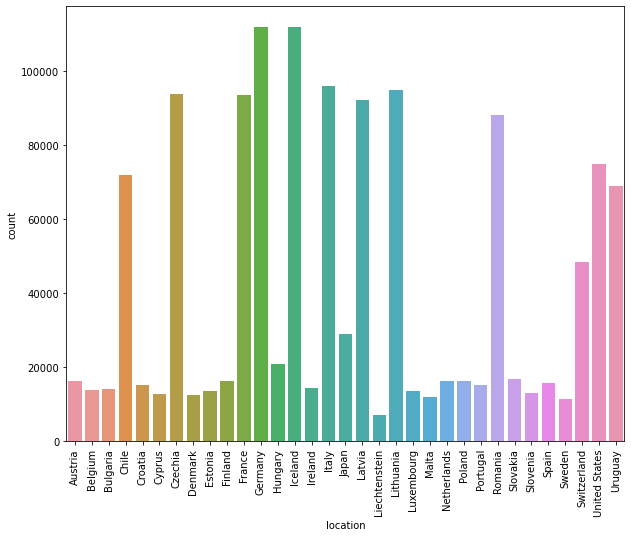

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x=new_data['location'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='count', ylabel='vaccine'>

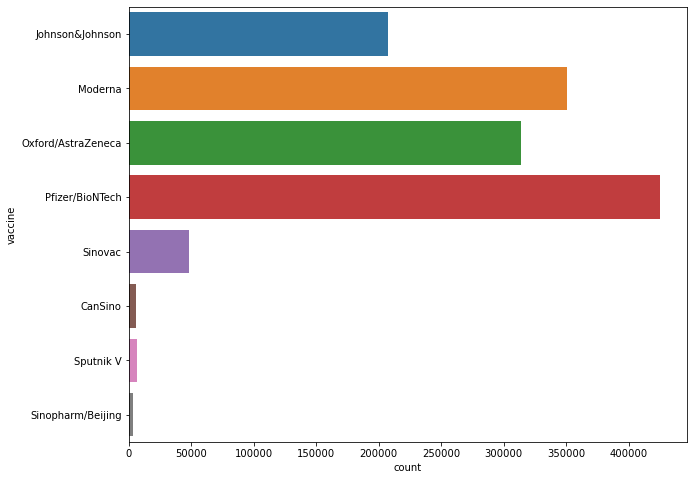

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(y=new_data['vaccine'])

<AxesSubplot:xlabel='count', ylabel='vaccines'>

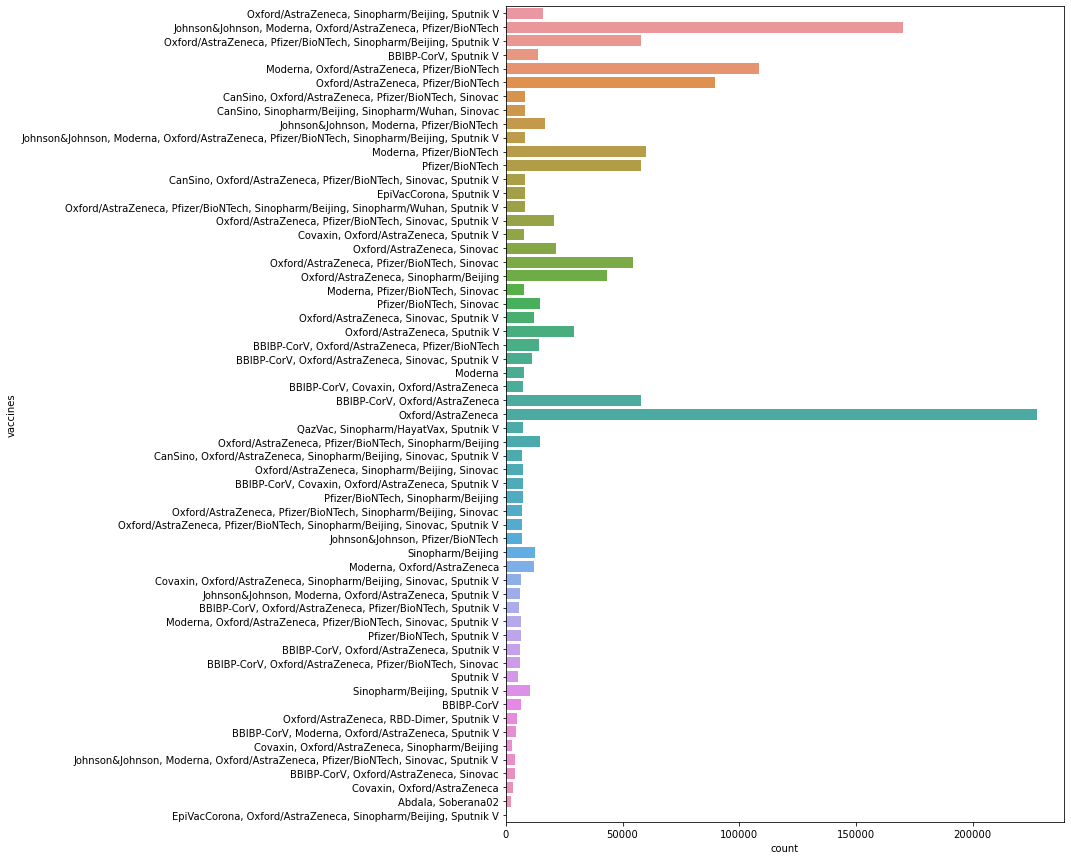

In [36]:
plt.figure(figsize=(10,15))
sns.countplot(y=new_data['vaccines'])

In [37]:
new_data['source_name'].nunique()

92

<AxesSubplot:xlabel='count', ylabel='source_name'>

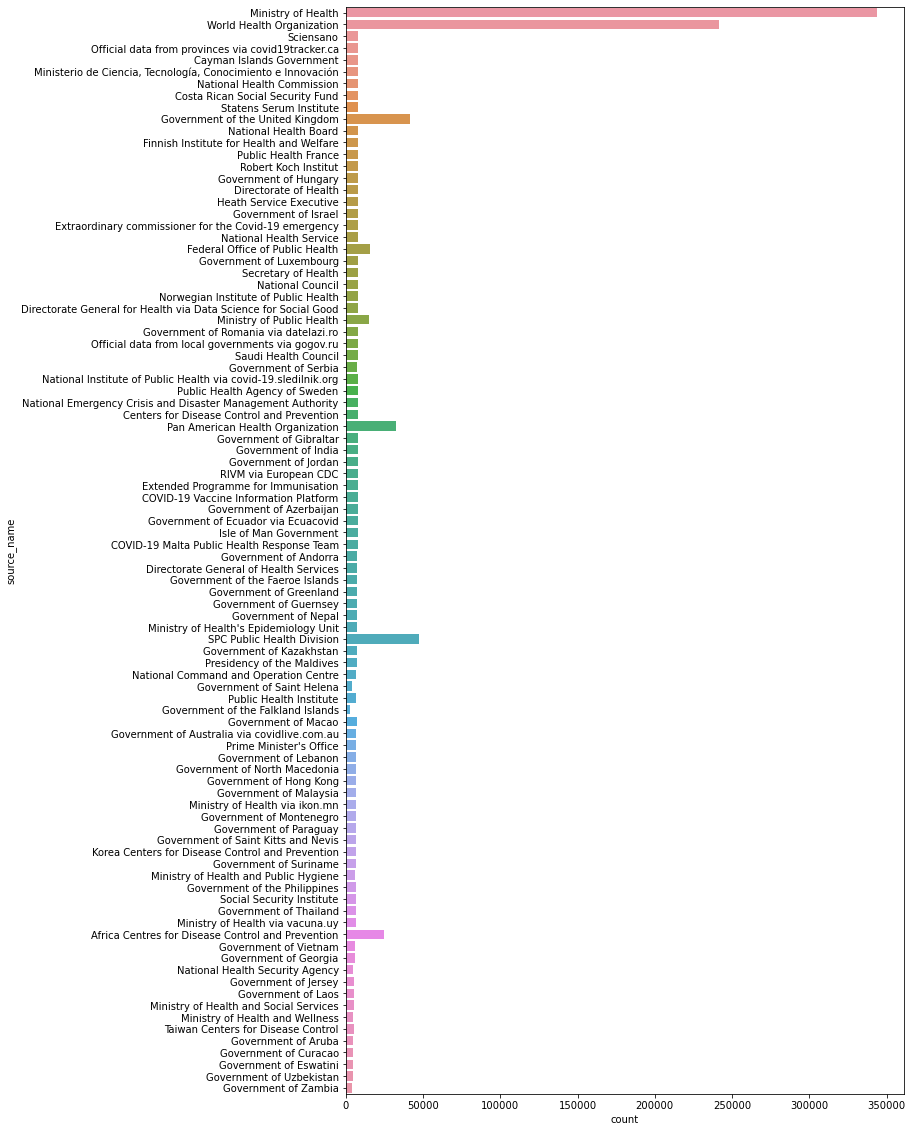

In [38]:
plt.figure(figsize=(10,20))
sns.countplot(y=new_data['source_name'])

In [39]:
new_data['source_website'].nunique()

147

In [40]:
pd.set_option('display.max_row',None)
new_data['source_website'].value_counts()

https://covid19.who.int/                                                                                                                                                             233510
https://stats.pacificdata.org/vis?tm=covid&pg=0&df[ds]=SPC2&df[id]=DF_COVID_VACCINATION&df[ag]=SPC&df[vs]=1.0                                                                         47455
https://coronavirus.data.gov.uk/details/vaccinations                                                                                                                                  41395
https://africacdc.org/covid-19-vaccination/                                                                                                                                           23651
https://ais.paho.org/imm/IM_DosisAdmin-Vacunacion.asp                                                                                                                                 19165
https://data.gov.lv/dati/eng/dataset/covid19-vakcinacijas   

In [41]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

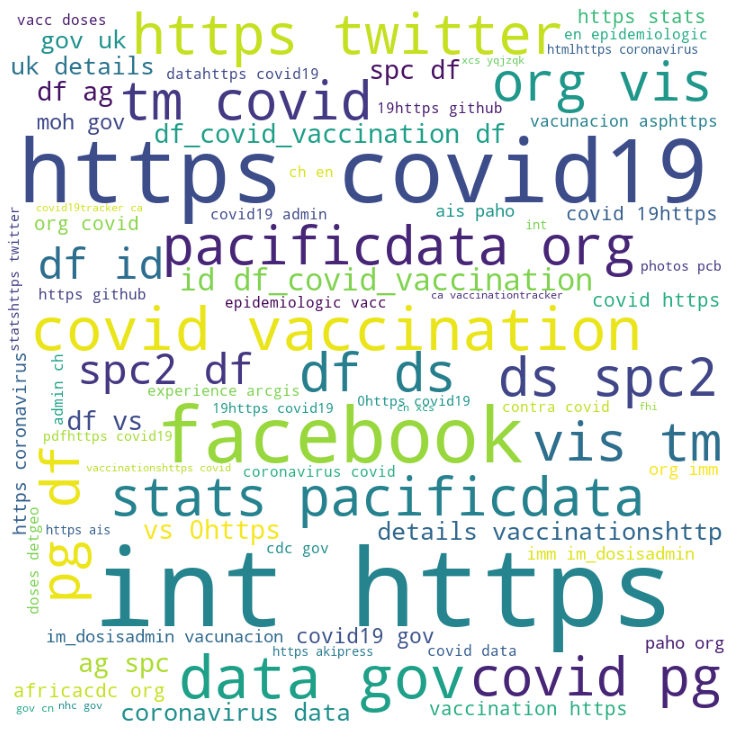

In [42]:
comment_words=''
stopwords= set(STOPWORDS)
for val in new_data['source_website']:
    val=str(val)
    tokens=val.split()
    
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    comment_words+= "".join(tokens)+""
    
    
wordcloud=WordCloud(width=800,height=800,
                   background_color='white',
                   stopwords=stopwords,
                   min_font_size=10
                   ).generate(comment_words)



plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


        

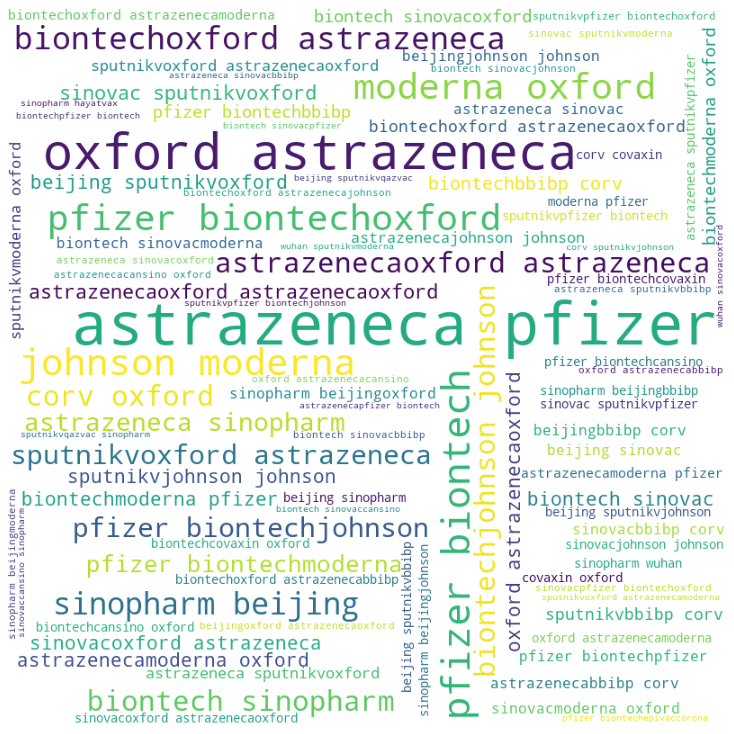

In [44]:
comment_words=''
stopwords= set(STOPWORDS)
for val in new_data['vaccines']:
    val=str(val)
    tokens=val.split()
    
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    comment_words+= "".join(tokens)+""
    
    
wordcloud=WordCloud(width=800,height=800,
                   
                   background_color='white',
                   stopwords=stopwords,
                   min_font_size=10
                   ).generate(comment_words)



plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
